In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import data, from https://github.com/guga31bb/nflfastR-data

#Enter desired years of data
YEARS = [2019,2018,2017,2016]

data = pd.DataFrame()

for i in YEARS:  
    #low_memory=False eliminates a warning
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' +
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    #sort=True eliminates a warning and alphabetically sorts columns
    data = data.append(i_data, sort=True)

#Give each row a unique index
data.reset_index(drop=True, inplace=True)
    
roster = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/' +
                     'roster-data/roster.csv.gz', compression='gzip', low_memory=False)

In [ ]:
roster.head()

In [12]:
data.head()

,air_epa,air_wpa,air_yards,alert_play_type,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,wpa,yac_epa,yac_wpa,yardline_100,yards,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,45.0,NaN,0.0,-10,0,CHI 35
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-0.020660,NaN,NaN,75.0,0.0,NaN,0.0,-10,10,GB 25
2,-1.095212,-0.031647,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-0.026088,0.107477,0.005559,75.0,0.0,1.0,0.0,-10,10,GB 25
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-0.066931,NaN,NaN,75.0,-10.0,NaN,-10.0,-10,10,GB 25
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.057563,NaN,NaN,85.0,42.0,NaN,0.0,-10,20,GB 15


In [19]:
for i in data.columns:
    print(i)

air_epa
air_wpa
air_yards
alert_play_type
assist_tackle
assist_tackle_1_player_id
assist_tackle_1_player_name
assist_tackle_1_team
assist_tackle_2_player_id
assist_tackle_2_player_name
assist_tackle_2_team
assist_tackle_3_player_id
assist_tackle_3_player_name
assist_tackle_3_team
assist_tackle_4_player_id
assist_tackle_4_player_name
assist_tackle_4_team
away_team
away_timeouts_remaining
away_wp
away_wp_post
blocked_player_id
blocked_player_name
comp_air_epa
comp_air_wpa
comp_yac_epa
comp_yac_wpa
complete_pass
cp
cpoe
def_wp
defensive_extra_point_attempt
defensive_extra_point_conv
defensive_two_point_attempt
defensive_two_point_conv
defteam
defteam_score
defteam_score_post
defteam_timeouts_remaining
desc
down
drive
drive_end_time
drive_end_yardline
drive_first_downs
drive_how_ended
drive_how_started
drive_inside20
drive_play_count
drive_possession_team_abbr
drive_start_time
drive_start_yardline
drive_time_of_possession
drive_yards_penalized
end_yardline_number
end_yardline_side
ep
epa
e

In [20]:
data['posteam'].head()

0    GB
1    GB
2    GB
3    GB
4    GB
Name: posteam, dtype: object

In [23]:
ne = data[data['posteam']=="NE"]
ne.head()

,air_epa,air_wpa,air_yards,alert_play_type,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,wpa,yac_epa,yac_wpa,yardline_100,yards,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
2346,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,45.0,NaN,0.0,15,0,PIT 35
2347,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-0.024361,NaN,NaN,80.0,-1.0,NaN,-1.0,15,10,NE 20
2348,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.011622,NaN,NaN,81.0,7.0,NaN,7.0,15,11,NE 19
2349,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.061529,NaN,NaN,74.0,9.0,NaN,9.0,15,4,NE 26
2350,NaN,NaN,NaN,NaN,1.0,00-0032150,S.Nelson,PIT,00-0027862,T.Alualu,...,-0.006209,NaN,NaN,65.0,3.0,NaN,3.0,15,10,NE 35


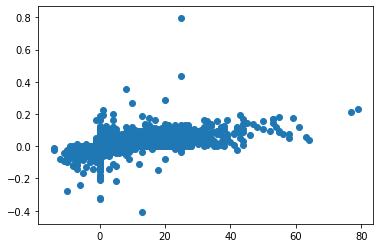

In [26]:
plt.scatter(x=ne['yards_gained'], y=ne['wpa'])